In [ ]:
from OpenGL.GL import *
from OpenGL.GLUT import *
from OpenGL.GLU import *

# Define the vertices of the triangle
vertices = ((-0.5, -0.5), (0.5, -0.5), (0.0, 0.5))

# Define the rotation angle
angle = 0.0

# Initialize rotation point
rotation_point = (0, 0)

# Function to draw the triangle
def draw_triangle():
    glBegin(GL_TRIANGLES)
    for vertex in vertices:
        glVertex2fv(vertex)
    glEnd()

# Function to rotate the triangle around a given point
def rotate_around_point(point, angle):
    glTranslatef(point[0], point[1], 0.0)
    glRotatef(angle, 0, 0, 1)
    glTranslatef(-point[0], -point[1], 0.0)

# Function to display the OpenGL scene
def display():
    glClear(GL_COLOR_BUFFER_BIT)
    glLoadIdentity()

    glColor3f(1.0, 0, 0)

    # Rotate around the specified point
    rotate_around_point(rotation_point, angle)

    draw_triangle()

    glutSwapBuffers()

# Function to handle window resizing
def reshape(width, height):
    glViewport(0, 0, width, height)
    glMatrixMode(GL_PROJECTION)
    glLoadIdentity()
    gluOrtho2D(-1, 1, -1, 1)
    glMatrixMode(GL_MODELVIEW)
    glLoadIdentity()

# Function to update the scene
def update(value):
    global angle
    angle += 1
    glutPostRedisplay()
    glutTimerFunc(10, update, 0)

# Main function
def main():
    global rotation_point
    glutInit()
    glutInitDisplayMode(GLUT_DOUBLE | GLUT_RGB)
    glutInitWindowSize(800, 600)
    glutCreateWindow(b"OpenGL Triangle Rotation")

    glClearColor(0.0, 0.0, 0.0, 1.0)

    # Prompt the user for rotation point coordinates
    x = float(input("Enter x-coordinate of rotation point: "))
    y = float(input("Enter y-coordinate of rotation point: "))
    rotation_point = (x, y)

    glutDisplayFunc(display)
    glutReshapeFunc(reshape)
    glutTimerFunc(10, update, 0)

    glutMainLoop()

if __name__ == "__main__":
    main()


Enter x-coordinate of rotation point: 0
Enter y-coordinate of rotation point: 0


In [ ]:
from OpenGL.GL import *
from OpenGL.GLUT import *
from OpenGL.GLU import *

# Define the vertices of the triangle
vertices = ((-0.5, -0.5), (0.5, -0.5), (0.0, 0.5))

# Define the rotation angle
angle = 0.0

# Initialize rotation point
rotation_point = (0, 0)

# Define colors for the triangle
colors = [(1.0, 0.0, 0.0), (0.0, 1.0, 0.0), (0.0, 0.0, 1.0)]  # Red, Green, Blue

# Index to track the current color
color_index = 0

# Function to draw the triangle
def draw_triangle(color):
    glColor3fv(color)  # Set color
    glBegin(GL_TRIANGLES)
    for vertex in vertices:
        glVertex2fv(vertex)
    glEnd()

# Function to rotate the triangle around a given point
def rotate_around_point(point, angle):
    glTranslatef(point[0], point[1], 0.0)
    glRotatef(angle, 0, 0, 1)
    glTranslatef(-point[0], -point[1], 0.0)

# Function to display the OpenGL scene
def display():
    global color_index
    glClear(GL_COLOR_BUFFER_BIT)
    glLoadIdentity()

    # Rotate around the specified point
    rotate_around_point(rotation_point, angle)

    # Get the current color
    current_color = colors[color_index]

    draw_triangle(current_color)

    glutSwapBuffers()

# Function to handle window resizing
def reshape(width, height):
    glViewport(0, 0, width, height)
    glMatrixMode(GL_PROJECTION)
    glLoadIdentity()
    gluOrtho2D(-1, 1, -1, 1)
    glMatrixMode(GL_MODELVIEW)
    glLoadIdentity()

# Function to update the scene
def update(value):
    global angle, color_index
    angle += 1
    # Cycle through colors after each rotation
    color_index = (color_index + 1) % len(colors)
    glutPostRedisplay()
    glutTimerFunc(10, update, 0)

# Main function
def main():
    global rotation_point
    glutInit()
    glutInitDisplayMode(GLUT_DOUBLE | GLUT_RGB)
    glutInitWindowSize(800, 600)
    glutCreateWindow(b"OpenGL Triangle Rotation")

    glClearColor(0.0, 0.0, 0.0, 1.0)

    # Prompt the user for rotation point coordinates
    x = float(input("Enter x-coordinate of rotation point: "))
    y = float(input("Enter y-coordinate of rotation point: "))
    rotation_point = (x, y)

    glutDisplayFunc(display)
    glutReshapeFunc(reshape)
    glutTimerFunc(1, update, 0)

    glutMainLoop()

if __name__ == "__main__":
    main()


Enter x-coordinate of rotation point: 0
Enter y-coordinate of rotation point: 0


Enter x-coordinate of the center of rotation: 0
Enter y-coordinate of the center of rotation: 0


TypeError: list indices must be integers or slices, not tuple

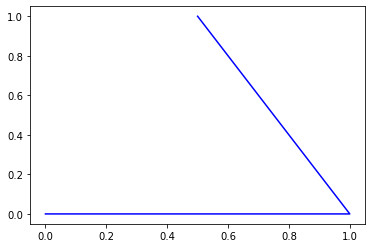

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define the vertices of the triangle
vertices = np.array([[0, 0], [1, 0], [0.5, 1]])

# Define the rotation angle (in degrees)
angle_degrees = 30

# Function to rotate a point around another point by a given angle (in radians)
def rotate_point(point, center, angle_radians):
    x_rotated = center[0] + np.cos(angle_radians) * (point[0] - center[0]) - np.sin(angle_radians) * (point[1] - center[1])
    y_rotated = center[1] + np.sin(angle_radians) * (point[0] - center[0]) + np.cos(angle_radians) * (point[1] - center[1])
    return [x_rotated, y_rotated]

# Main function
def main():
    # Prompt user for the center of rotation
    center_x = float(input("Enter x-coordinate of the center of rotation: "))
    center_y = float(input("Enter y-coordinate of the center of rotation: "))
    center = [center_x, center_y]

    # Convert angle to radians
    angle_radians = np.deg2rad(angle_degrees)

    # Rotate each vertex around the given center
    rotated_vertices = [rotate_point(vertex, center, angle_radians) for vertex in vertices]

    # Plot the original and rotated triangles
    plt.plot(vertices[:, 0], vertices[:, 1], 'b-', label='Original Triangle')
    plt.plot(rotated_vertices[:, 0], rotated_vertices[:, 1], 'r-', label='Rotated Triangle')
    plt.plot(center[0], center[1], 'ko', label='Rotation Center')

    # Set plot limits and labels
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Triangle Rotation')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()
